<a href="https://colab.research.google.com/github/Yatharth31/DL-LAB/blob/main/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Convolutional Neural Network on MNIST Dataset


In [2]:
import tensorflow as tp
from keras.datasets import mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

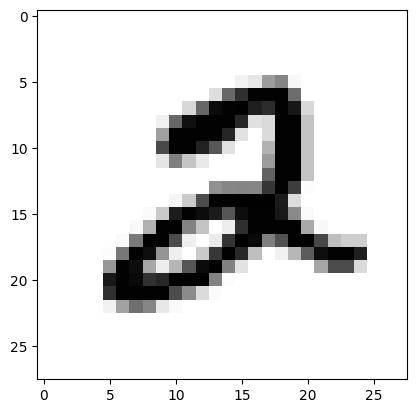

In [6]:
plt.imshow(x_train[5],cmap='binary')
print(x_train[5])

In [7]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [8]:
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)
print(y_train[5],y_train_encoded[5])
print(y_train[0],y_train_encoded[0])

2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
print("y_train encoded shape ", y_train_encoded.shape)
print("y_test encoded shape ", y_test_encoded.shape)

y_train encoded shape  (60000, 10)
y_test encoded shape  (10000, 10)


#Preprocessing

In [10]:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [11]:
# display pixel value
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [12]:
# Data normalization
import math
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)
epsilon = pow(math.e,-10)


In [13]:
x_train_norm=(x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshaped-x_mean)/(x_std+epsilon)

#CNN MODEL

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, MaxPooling2D, Flatten

In [16]:
model = Sequential()
model.add(Reshape((28,28,1), input_shape=(784,)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
#compiling model
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
#Training the model
model.fit(x_train_norm , y_train_encoded,epochs=3)

Epoch 1/3
1388/1875 [=====================>........] - ETA: 1:03 - loss: 0.3438 - accuracy: 0.8999

In [ ]:
#Evaluating the model
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('Testset Accuracy=',accuracy*100)

In [ ]:
pred = model.predict([x_test_norm])
pred[2]

In [ ]:
plt.imshow(x_test[2],cmap='binary')